## Persiapan Dataset dan Library

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import Input
from keras.wrappers.scikit_learn import KerasRegressor

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
# Load data and filtering
df = pd.read_csv('factbook_tr.csv')
df = df[['GDP', 'Exports', 'Imports', 'Industrial production growth rate', 'Investment', 'Unemployment rate']]
df

,GDP,Exports,Imports,Industrial production growth rate,Investment,Unemployment rate
0,3745000000000,538800000000,401800000000,6.6,24.0,4.7
1,2362000000000,893300000000,716700000000,2.2,17.6,10.6
2,310200000000,113000000000,36210000000,2.8,17.2,25.0
3,1408000000000,162500000000,92910000000,6.4,19.1,8.3
4,251900000000,130700000000,121100000000,4.7,20.4,3.4
...,...,...,...,...,...,...
144,1609000000000,336400000000,329300000000,0.7,19.3,8.6
145,937600000000,172500000000,222000000000,3.0,25.4,10.4
146,1782000000000,347200000000,439400000000,0.9,16.2,4.8
147,611700000000,86890000000,98100000000,1.9,25.3,5.1


# Membagi Data Menjadi Data Latih dan Data Uji

In [3]:
# Membagi data menjadi data training dan data testing
X = df.drop('GDP', axis=1)
y = df['GDP']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalisasi Data

In [4]:
# Normalisasi data
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
y_train = pd.DataFrame(scaler.fit_transform(y_train.values.reshape(-1, 1)), columns=['GDP'])
y_test = pd.DataFrame(scaler.transform(y_test.values.reshape(-1, 1)), columns=['GDP'])

In [11]:
# Menampilkan shape setiap layer
print(x_train.shape)
print(y_test.shape)

(119, 5)
(30, 1)


# Membuat Fungsi Create Model

Fungsi create model digunakan untuk membantu proses pembuatan model. Fungsi ini akan mengembalikan model yang telah dibuat. Model yang dibuat menggunakan 3 layer yaitu input layer, hidden layer, dan output layer. Input layer memiliki 5 neuron, dan output layer memiliki 1 neuron. Fungsi aktivasi yang digunakan pada input layer dan hidden layer adalah relu, sedangkan pada output layer adalah linear. Fungsi aktivasi relu digunakan untuk mengatasi masalah vanishing gradient, sedangkan fungsi aktivasi linear digunakan untuk menghasilkan output yang berupa bilangan real. Keluaran dari fungsi ini nantinya adalah menentukan berapa banyak neuron yang akan digunakan pada setiap hidden layer dan berapa banyak hidden layer yang akan digunakan.

In [12]:
# Fungsi untuk membuat model MLP
def create_model(hidden_layers, neurons):
    model = Sequential()
    model.add(Input(shape=(x_train.shape[1],), name='input'))
    for _ in range(hidden_layers-1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(y_test.shape[1], activation='linear', name='output'))
    model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
    return model

In [13]:
# Membungkus model dengan KerasRegressor
model = KerasRegressor(build_fn=create_model, verbose=0)

C:\Users\akmal\AppData\Local\Temp\ipykernel_20020\872168717.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


In [15]:
# Melakukan proses pencarian parameter terbaik
params = {
    'hidden_layers': [1, 2, 3, 4],
    'neurons': [i for i in range(1, 20)]
}

gridSearch = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='neg_mean_squared_error')
result = gridSearch.fit(x_train, y_train, epochs=100, batch_size=10, verbose=0)

print("Best params: ", result.best_params_)

Best params:  {'hidden_layers': 4, 'neurons': 15}


Dari output didapatkan, bahwa parameter terbaik adalah dengan jumlah hidden layer = 4 dan jumlah neuron = 15. Kami mengasumsikan untuk setiap hidden layer dari hidden layer 1 sd 4 memiliki jumlah neuron dikurang dengan 4 neuron dari hidden layer sebelumnya. Sehingga jumlah neuron pada setiap hidden layer adalah 15, 11, 7, dan 3.

# Multi Layer Perceptron

Langkah-langkah yang dilakukan pada MLP adalah sebagai berikut:
1. Mempersiapkan dataset
2. Normalisasikan data
3. Membagi data menjadi data latih dan data uji
4. Inisialisasi arsitektur MLP
5. Inisialisasi bobot dan bias (langsung dilakukan oleh keras)
6. Propagasi maju
7. Propagasi mundur (langsung dilakukan oleh keras)
8. Melakukan iterasi pelatihan (epochs)
9. Evaluasi model
10. Prediksi

In [16]:
# Pembuatan model neural network
model = Sequential()
model.add(Input(shape=(x_train.shape[1],), name='input')) # Input layer dengan 5 neuron
model.add(Dense(15, activation='relu', name='hidden1')) # Hidden layer 1 dengan 15 neuron
model.add(Dropout(0.01)) # Lapisan Dropout dengan dropout rate 0.01
model.add(Dense(11, activation='relu', name='hidden2')) # Hidden layer 2 dengan 11 neuron
model.add(Dropout(0.01)) # Lapisan Dropout dengan dropout rate 0.01
model.add(Dense(7, activation='relu', name='hidden3')) # Hidden layer 3 dengan 7 neuron
model.add(Dropout(0.01)) # Lapisan Dropout dengan dropout rate 0.01
model.add(Dense(3, activation='relu', name='hidden4')) # Hidden layer 4 dengan 3 neuron
model.add(Dropout(0.01)) # Lapisan Dropout dengan dropout rate 0.01
model.add(Dense(y_test.shape[1], name='output')) # Output layer dengan 1 neuron

Penjelasan setiap parameter pada program MLP diatas adalah:
1. Sequential ->  Ini adalah jenis model yang digunakan dalam Keras untuk membuat model neural network berurutan. Model berurutan berarti bahwa setiap lapisan ditambahkan secara berurutan satu per satu.
2. Input -> Ini adalah lapisan input yang menentukan bentuk input data. Dalam kasus ini, input layer memiliki 5 fitur (atribut) dan menggunakan 'input' sebagai nama lapisan.
3. Dense -> Digunakan untuk menentukan lapisan Dense (sepenuhnya terhubung) dalam model neural network. Dalam kasus ini, kami membaginya ke dalam 4 lapisan hidden layer, dengan lapisan pertama terdiri dari 15 neuron, lapisan kedua terdiri dari 11 neuron, lapisan ketiga terdiri dari 7 neuron, dan lapisan keempat terdiri dari 3 neurons, sedangkan lapisan output memiliki 1 neuron karena hanya terdapat 1 output
4. Dropout -> Digunakan untuk mengurangi overfitting pada mode. Dalam kasus ini, dropout rate ditentukan dengan angka 0.2, yang berarti 20% neuron akan dinonaktifkan secara acak.

In [17]:
model.summary()

Model: "sequential_381"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 15)                90        
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 hidden2 (Dense)             (None, 11)                176       
                                                                 
 dropout_1 (Dropout)         (None, 11)                0         
                                                                 
 hidden3 (Dense)             (None, 7)                 84        
                                                                 
 dropout_2 (Dropout)         (None, 7)                 0         
                                                                 
 hidden4 (Dense)             (None, 3)              

Dari visualisasi menggunakan tabel dapat diketahui ringkasan arsitektur model yang telah dibuat seperti, jumlah parameter yang dapat dioptimalkan dan juga ukuran output dari setiap layer dalam model.

## Compile dan Fit Model

In [26]:
# Compile dan fit model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.fit(x_train, y_train, epochs=1000, batch_size=32, verbose=0, validation_data=(x_test, y_test))

In [19]:
# Menampilkan hasil prediksi
history = model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0,
                    validation_data=(x_test, y_test))
history.history

{'loss': [0.0008051318000070751,
  0.0007269249181263149,
  0.0009314263588748872,
  0.0006234591128304601,
  0.0006537013687193394,
  0.001022839336656034,
  0.000938061042688787,
  0.0033350230660289526,
  0.000676022085826844,
  0.000707097991835326],
 'mse': [0.0008051317417994142,
  0.0007269249181263149,
  0.0009314263588748872,
  0.0006234591128304601,
  0.0006537013687193394,
  0.001022839336656034,
  0.000938061042688787,
  0.0033350232988595963,
  0.000676022085826844,
  0.000707097991835326],
 'val_loss': [0.008836312219500542,
  0.008739900775253773,
  0.008361524902284145,
  0.00785718485713005,
  0.007767838425934315,
  0.008004635572433472,
  0.008094348944723606,
  0.008028795942664146,
  0.008014975115656853,
  0.008076580241322517],
 'val_mse': [0.008836312219500542,
  0.008739900775253773,
  0.008361524902284145,
  0.00785718485713005,
  0.007767838425934315,
  0.008004635572433472,
  0.008094348944723606,
  0.008028795942664146,
  0.008014975115656853,
  0.008076580

Akan diambil history dari training model yang dapat digunakan untuk menganalisis dan mempresentasikan kinerja model selama training.

## Plotting Loss dan Akurasi

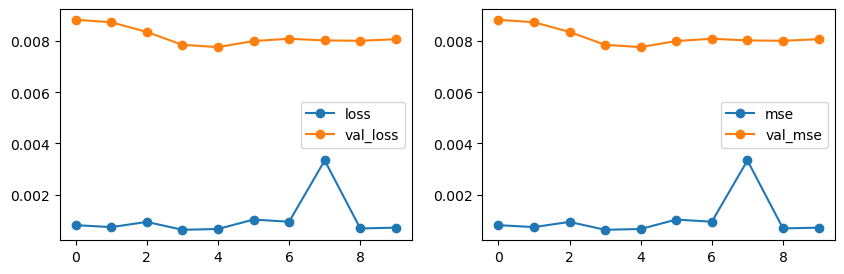

In [20]:
# Plot history loss dan mse
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].plot(history.history['loss'], label='loss', marker='o')
ax[0].plot(history.history['val_loss'], label='val_loss', marker='o')
ax[0].legend()

ax[1].plot(history.history['mse'], label='mse', marker='o')
ax[1].plot(history.history['val_mse'], label='val_mse', marker='o')
ax[1].legend()

Dibuat visualisasi yang menampilkan perubahan nilai loss dan nilai MSE pada saat dilakukan proses model neural network. Dari hasil visualisasi dapat diketahui bahwa nilai loss cenderung semakin kecil yang berarti performa model yang dibuat telah baik karena prediksi model sudah mendekati nilai sebenarnya dari data . Begitu juga dengan nilai MSE dari hasil visualisasi didapatkan bahwa nilai MSE pada data training dan data validasi cenderung semakin kecil dan konsisten yang berarti model yang dibuat telah baik dalam melakukan generalisasi.

## Evaluasi Model

In [25]:
y_pred = model.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: ", mean_absolute_error(y_test, y_pred))

1/1 [==============================] - 0s 25ms/step
RMSE:  0.08986979531809514
MAE:  0.025769443065386317


Nilai RMSE sebesar 0.0898 menunjukkan bahwa rata-rata kesalahan prediksi model (dalam satuan target asli) adalah sekitar 0.0898. Semakin kecil nilai RMSE, semakin baik performa model dalam memprediksi nilai target dengan akurat. Sementara itu, nilai MAE sebesar 0.0258 menunjukkan bahwa rata-rata selisih absolut antara nilai aktual dan nilai prediksi adalah sekitar 0.0258. MAE memberikan gambaran tentang seberapa dekat nilai prediksi dengan nilai aktual dalam skala absolut. Dalam kedua metrik evaluasi ini, semakin rendah nilai RMSE atau MAE, semakin baik performa model regresi dalam memprediksi nilai target dengan akurat dan mendekati nilai sebenarnya.

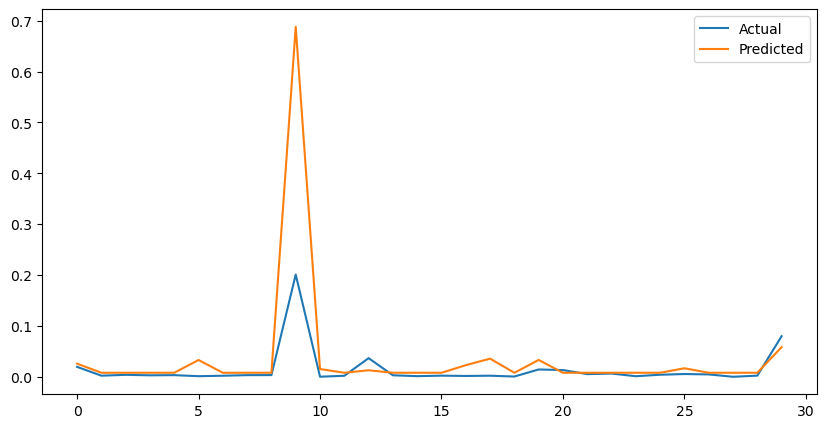

In [22]:
# Plot hasil prediksi
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()

Gambar diatas merupakan hasil visualisasi yang digunakan untuk membandingkan nilai hasil prediksi yang dihasilkan oleh model yang telah dibuat dengan nilai sebenarnya yang ada pada dataset. Dapat diketahui bahwa model yang telah dibuat mengikuti tren yang sama dengan data yang sebenarnya.